In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from termcolor import colored
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
# Load the dataset to inspect it
path = 'data/ckd-dataset-v2.csv'
df = pd.read_csv(path)

df.head()


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [4]:
# drop columns with all missing values
df = df.dropna(how='all')

In [5]:
# first let's drop the first two rows that are immediately visible to be useless
df = df.iloc[2:].reset_index(drop=True)

In [6]:
# inspct row 1
df.iloc[1]

bp (Diastolic)                0
bp limit                      0
sg                1.009 - 1.011
al                          < 0
class                       ckd
rbc                           0
su                          < 0
pc                            0
pcc                           0
ba                            0
bgr                   112 - 154
bu                       < 48.1
sod                   133 - 138
sc                       < 3.65
pot                      < 7.31
hemo                11.3 - 12.6
pcv                 33.5 - 37.4
rbcc                4.46 - 5.05
wbcc              12120 - 14500
htn                           0
dm                            0
cad                           0
appet                         0
pe                            0
ane                           0
grf                   ≥ 227.944
stage                        s1
affected                      1
age                        < 12
Name: 1, dtype: object

In [7]:
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [8]:
# find nan values
df.isnull().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64

In [9]:
df.dtypes

bp (Diastolic)    object
bp limit          object
sg                object
al                object
class             object
rbc               object
su                object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sod               object
sc                object
pot               object
hemo              object
pcv               object
rbcc              object
wbcc              object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
grf               object
stage             object
affected          object
age               object
dtype: object

In [10]:
# output all values of the first row
df.loc[0]

bp (Diastolic)                0
bp limit                      0
sg                1.019 - 1.021
al                        1 - 1
class                       ckd
rbc                           0
su                          < 0
pc                            0
pcc                           0
ba                            0
bgr                       < 112
bu                       < 48.1
sod                   138 - 143
sc                       < 3.65
pot                      < 7.31
hemo                11.3 - 12.6
pcv                 33.5 - 37.4
rbcc                4.46 - 5.05
wbcc                7360 - 9740
htn                           0
dm                            0
cad                           0
appet                         0
pe                            0
ane                           0
grf                   ≥ 227.944
stage                        s1
affected                      1
age                        < 12
Name: 0, dtype: object

In [11]:
# rename columns with spaces in the name
df.rename(columns={'bp (Diastolic)': 'bp_diastolic'}, inplace=True)
df.rename(columns={'bp limit': 'bp_limit'}, inplace=True)
df.rename(columns={'class': 'has_ckd'}, inplace=True)

In [12]:
df.columns

Index(['bp_diastolic', 'bp_limit', 'sg', 'al', 'has_ckd', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [13]:
# show count of unique values for each column
for col in df.columns:
    print(col, df[col].nunique())

bp_diastolic 2
bp_limit 3
sg 5
al 5
has_ckd 2
rbc 2
su 6
pc 2
pcc 2
ba 2
bgr 10
bu 8
sod 9
sc 7
pot 4
hemo 10
pcv 10
rbcc 9
wbcc 9
htn 2
dm 2
cad 2
appet 2
pe 2
ane 2
grf 11
stage 5
affected 2
age 10


In [14]:
# show unique values for each column (since we know there aren't any columns with overwhealmingly many unique values)
for col in df.columns:
    print(colored(col, 'green'), df[col].unique())

bp_diastolic ['0' '1']
bp_limit ['0' '1' '2']
sg ['1.019 - 1.021' '1.009 - 1.011' '1.015 - 1.017' '≥ 1.023' '< 1.007']
al ['1 - 1' '< 0' '≥ 4' '3 - 3' '2 - 2']
has_ckd ['ckd' 'notckd']
rbc ['0' '1']
su ['< 0' '4 - 4' '2 - 2' '3 - 4' '1 - 2' '≥ 4']
pc ['0' '1']
pcc ['0' '1']
ba ['0' '1']
bgr ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
bu ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
sod ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
sc ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
pot ['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59']
hemo ['11.3 - 12.6' '8.7 - 10' '13.9 - 15.2' '≥ 16.5' '10 - 11.3' '7.4 - 8.7'
 '12.6 - 13.9' '15.2 - 16.5' '< 6.1' '6.1 - 7.4']
pcv ['33.5 - 37.4' '29.6 - 33.5' '41.3 - 45.2' '37.4 - 41.3' '≥ 49.1'
 '21.8 - 25.7' '45.

In [15]:
df_copy = df.copy()

In [16]:
# these columns already have valid numeric strings, so converting them to numeric first
to_numeric_1 = ['bp_diastolic', 'bp_limit', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad']
for col in to_numeric_1:
    df[col] = pd.to_numeric(df[col], errors='raise')

In [17]:
# turn class column into binary. cgk = 1, notckd = 0
df['has_ckd'] = df['has_ckd'].map({'ckd': 1, 'notckd': 0})
df['stage'] = df['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

In [18]:
def process_range(val):
    """This function processes the range values in the dataset and returns the average of the range.
    For < and ≥ values, it returns the lower and upper limits respectively.
    """
    try:
        # Try to convert directly to float (if it's already a valid number like '27')
        return float(val)
    except ValueError:
        # Handle ranges and comparisons
        if '-' in val:
            low, high = map(float, val.split('-'))
            return (low + high) / 2  # Take the midpoint of the range
        elif '<' in val:
            return float(val.replace('<', '').strip())  # Return the lower limit
        elif '≥' in val:
            return float(val.replace('≥', '').strip())  # Return the upper limit
        else:
            return np.nan  # Return NaN for anything unexpected

In [19]:
# process the rest of the columns
for col in df.columns:
    if col not in to_numeric_1 + ['has_ckd', 'stage']:
        df[col] = df[col].apply(process_range)

In [20]:
df.dtypes

bp_diastolic      int64
bp_limit          int64
sg              float64
al              float64
has_ckd           int64
rbc               int64
su              float64
pc                int64
pcc               int64
ba                int64
bgr             float64
bu              float64
sod             float64
sc              float64
pot             float64
hemo            float64
pcv             float64
rbcc            float64
wbcc            float64
htn               int64
dm                int64
cad               int64
appet           float64
pe              float64
ane             float64
grf             float64
stage             int64
affected        float64
age             float64
dtype: object

In [21]:
df.isnull().sum()

bp_diastolic    0
bp_limit        0
sg              0
al              0
has_ckd         0
rbc             0
su              0
pc              0
pcc             0
ba              0
bgr             0
bu              0
sod             0
sc              0
pot             0
hemo            0
pcv             0
rbcc            0
wbcc            0
htn             0
dm              0
cad             0
appet           0
pe              0
ane             0
grf             1
stage           0
affected        0
age             0
dtype: int64

In [22]:
df['grf'].unique()

array([227.944  , 139.8635 , 114.698  , 190.195  ,  39.20035,  64.3661 ,
        89.532  , 165.029  , 215.361  ,  26.6175 ,       nan])

In [23]:
# tried applying CDK-EPI formula to calculate GFR, but it didn't work out. (from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2866096/)
# The estimated values were way off
# instead let's use the mean value of the same class to fill in the missing values

# find row with NaN grf value
class_value = df[df['grf'].isnull()]['has_ckd']
print(f"class for missing grf: {class_value}")

# find median value of grf for the same class. Using median because we transformed ranges to single values
median_grf = df[df['has_ckd'] == 1]['grf'].median()
print(f"Median grf for class 1: {median_grf}")

# fill in the missing value if class == 1 and grf is NaN
df.loc[(df['has_ckd'] == 1) & (df['grf'].isnull()), 'grf'] = median_grf



class for missing grf: 179    1
Name: has_ckd, dtype: int64
Median grf for class 1: 26.6175


In [24]:
df.isnull().sum()

bp_diastolic    0
bp_limit        0
sg              0
al              0
has_ckd         0
rbc             0
su              0
pc              0
pcc             0
ba              0
bgr             0
bu              0
sod             0
sc              0
pot             0
hemo            0
pcv             0
rbcc            0
wbcc            0
htn             0
dm              0
cad             0
appet           0
pe              0
ane             0
grf             0
stage           0
affected        0
age             0
dtype: int64

In [25]:
df.head()

,bp_diastolic,bp_limit,sg,al,has_ckd,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.020,1.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
1,0,0,1.010,0.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
2,0,0,1.010,4.0,1,1,0.0,1,0,1,...,0,0,0,1.0,0.0,0.0,139.8635,1,1.0,12.0
3,1,1,1.010,3.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,139.8635,1,1.0,12.0
4,0,0,1.016,0.0,1,0,0.0,0,0,0,...,0,1,0,1.0,1.0,0.0,139.8635,1,1.0,16.0


In [61]:
def pretty_print_dict(d, accentKeys=[]):
    for key in accentKeys:
        if key in d:
            print(f"{key}: {colored(round(d[key], 4), 'green')}")
    for key, value in d.items():
        if key not in accentKeys:
            print(f"{key}: {colored(round(value, 4), 'yellow')}")

def linear_regression(X, y, show_results=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    coefficients = model.coef_
    intercept = model.intercept_

    results = {
        'intercept': intercept,
        'r2': r2_score(y_test, y_pred),
        'mse': mean_squared_error(y_test, y_pred)
    }
    for feature, coef in zip(X.columns, coefficients):
        results[feature] = coef
    
    if show_results:
        pretty_print_dict(results, accentKeys=['r2', 'mse'])
    return results, model



In [27]:
X = df[['bu', 'hemo', 'wbcc', 'rbcc', 'htn']]
y = df['has_ckd']
r1 = linear_regression(X, y)

r2: 0.616
mse: 0.09
intercept: 2.2105
bu: -0.0004
hemo: -0.1018
wbcc: 0.0
rbcc: -0.0893
htn: 0.2129


In [28]:
# compare using study weights

def manual_linear_regression(X):
    # Using weights from the study: https://ieeexplore.ieee.org/document/9315878
    predictions = (
        X['bu'] * -0.0002 +
        X['hemo'] * -0.091 +
        X['wbcc'] * 0.0 +  # wbcc has no effect
        X['rbcc'] * -0.0076 +
        X['htn'] * 0.288 +
        1.5892  # Intercept
    )
    return predictions

y_pred_manual = manual_linear_regression(X)
r2_manual = r2_score(y, y_pred_manual)
mse_manual = mean_squared_error(y, y_pred_manual)

print(f"Manual Model R-squared: {round(r2_manual, 4)}")
print(f"Manual Model Mean Squared Error: {round(mse_manual, 4)}")

Manual Model R-squared: 0.5766
Manual Model Mean Squared Error: 0.0976


In [62]:
# trying grf instead of wbcc
X = df[['hemo', 'rbcc', 'htn', 'grf']]
y = df['has_ckd']
r2, linear_model_2 = linear_regression(X, y) # slightly better r2 and mse

r2: 0.6953
mse: 0.0714
intercept: 2.2116
hemo: -0.0899
rbcc: -0.0916
htn: 0.172
grf: -0.0014


In [30]:
# trying Simple Linear Regression with hemo, same as in study (table 3)
X = df[['hemo']]
y = df['has_ckd']
r3 = linear_regression(X, y) # this is not as good as r1, r2

r2: 0.5781
mse: 0.0989
intercept: 2.3667
hemo: -0.1402


In [31]:
df.head()

,bp_diastolic,bp_limit,sg,al,has_ckd,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.020,1.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
1,0,0,1.010,0.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
2,0,0,1.010,4.0,1,1,0.0,1,0,1,...,0,0,0,1.0,0.0,0.0,139.8635,1,1.0,12.0
3,1,1,1.010,3.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,139.8635,1,1.0,12.0
4,0,0,1.016,0.0,1,0,0.0,0,0,0,...,0,1,0,1.0,1.0,0.0,139.8635,1,1.0,16.0


In [32]:
X = df[['bp_diastolic', 'bp_limit', 'sg', 'al', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'age']]
y = df['has_ckd']

r4 = linear_regression(X, y)

r2: 0.3534
mse: 0.1515
intercept: 29.7656
bp_diastolic: -0.1601
bp_limit: 0.1338
sg: -26.1268
al: 0.0487
rbc: -0.0393
su: 0.0147
pc: -0.0703
pcc: -0.0697
ba: -0.2424
bgr: 0.0001
bu: 0.0021
sod: -0.01
sc: -0.0552
pot: 0.0352
hemo: -0.0808
pcv: -0.0026
rbcc: -0.0274
wbcc: -0.0
htn: 0.101
dm: 0.0663
cad: -0.082
appet: 0.1175
pe: -0.0076
ane: -0.1222
grf: -0.0007
age: -0.0017


In [33]:
df['stage'].unique()

array([1, 4, 3, 2, 5])

In [34]:
df['affected'].unique()

array([1., 0.])

In [35]:
df.head()

,bp_diastolic,bp_limit,sg,al,has_ckd,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.020,1.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
1,0,0,1.010,0.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
2,0,0,1.010,4.0,1,1,0.0,1,0,1,...,0,0,0,1.0,0.0,0.0,139.8635,1,1.0,12.0
3,1,1,1.010,3.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,139.8635,1,1.0,12.0
4,0,0,1.016,0.0,1,0,0.0,0,0,0,...,0,1,0,1.0,1.0,0.0,139.8635,1,1.0,16.0


In [36]:
import pandas as pd
import statsmodels.api as sm
# Example: Assuming df is your DataFrame, with 'y' as the dependent variable and the rest as independent variables
# 1. Define the dependent and independent variables
X = df[['bp_diastolic', 'bp_limit', 'sg', 'al', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'age']]
y = df['has_ckd']
# 2. Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)
# 3. Fit the OLS model
model = sm.OLS(y, X).fit()
# 4. Get the summary with p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                has_ckd   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     24.92
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.69e-45
Time:                        11:37:06   Log-Likelihood:                 18.707
No. Observations:                 200   AIC:                             16.59
Df Residuals:                     173   BIC:                             105.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.6034      4.478      6.611   

In [37]:
# get the p-values from the model
p_values = model.pvalues
p_values_lt_than_0_05 = p_values[p_values < 0.05]
print(p_values_lt_than_0_05)

const       4.569955e-10
bp_limit    3.019935e-02
sg          1.813042e-08
al          4.455818e-02
hemo        5.206659e-07
ane         4.703927e-03
grf         2.076229e-03
dtype: float64


In [38]:
# get feature names from p_values_lt_than_0_05
feature_names = p_values_lt_than_0_05.index
feature_names
# drop 'const'
feature_names = feature_names.drop('const')
feature_names

Index(['bp_limit', 'sg', 'al', 'hemo', 'ane', 'grf'], dtype='object')

In [39]:
df.head()

,bp_diastolic,bp_limit,sg,al,has_ckd,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.020,1.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
1,0,0,1.010,0.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0
2,0,0,1.010,4.0,1,1,0.0,1,0,1,...,0,0,0,1.0,0.0,0.0,139.8635,1,1.0,12.0
3,1,1,1.010,3.0,1,0,0.0,0,0,0,...,0,0,0,0.0,0.0,0.0,139.8635,1,1.0,12.0
4,0,0,1.016,0.0,1,0,0.0,0,0,0,...,0,1,0,1.0,1.0,0.0,139.8635,1,1.0,16.0


In [40]:
r5 = linear_regression(df[['bp_limit', 'sg', 'al', 'hemo', 'ane', 'grf']], df['has_ckd']) # winning model - session 1

r2: 0.7192
mse: 0.0658
intercept: 34.8392
bp_limit: 0.033
sg: -32.3444
al: 0.0355
hemo: -0.1009
ane: -0.1223
grf: -0.0013


### Logistic Regression

#### Correlation Matrix
If you see any pairs with high correlations (> 0.7), you may need to remove one of the correlated features or apply dimensionality reduction

          hemo      rbcc       htn       grf        bu
hemo  1.000000  0.638086 -0.573199  0.579358 -0.480684
rbcc  0.638086  1.000000 -0.510611  0.420097 -0.389282
htn  -0.573199 -0.510611  1.000000 -0.526852  0.330562
grf   0.579358  0.420097 -0.526852  1.000000 -0.407753
bu   -0.480684 -0.389282  0.330562 -0.407753  1.000000


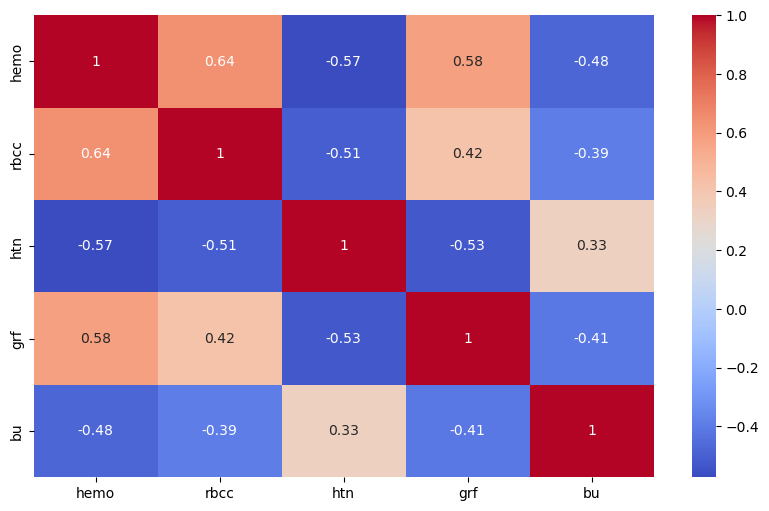

In [43]:
# Select the features in question
X = df[['hemo', 'rbcc', 'htn', 'grf', 'bu']]

# Compute the correlation matrix
corr_matrix = X.corr()
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

-----> **From your correlation matrix and VIF values, we can see that some features, especially hemo and rbcc, exhibit high multicollinearity**

#### Variance Inflation Factor
VIF quantifies how much a feature's variance is inflated due to collinearity with other features. A VIF above 5–10 suggests high collinearity, and the feature should be considered for removal.

In [42]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature        VIF
0    hemo  40.803048
1    rbcc  39.773699
2     htn   2.015792
3     grf   4.619472
4      bu   3.615426


-----> **There is severe multicollinearity between hemo and rbcc.** A VIF > 10 is generally considered high. They are 39 and 40

In [49]:
def logistic_regression(X, y, show_results=True):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the logistic regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict to access specific values

    # Collect performance metrics
    results = {
        'accuracy': accuracy,
        'precision': class_report['1']['precision'],  # Precision for the positive class
        'recall': class_report['1']['recall'],        # Recall for the positive class
        'f1_score': class_report['1']['f1-score']     # F1-score for the positive class
    }

    # Get feature coefficients
    coefficients = model.coef_[0]
    intercept = model.intercept_[0]

    # Add coefficients and intercept to the results
    results['intercept'] = intercept
    for feature, coef in zip(X.columns, coefficients):
        results[feature] = coef

    # Pretty print results if requested
    if show_results:
        pretty_print_dict(results, accentKeys=['accuracy', 'precision', 'recall', 'f1_score'])

    # Return the trained model and evaluation results
    return model, results

In [84]:
# two approaches: 1. Remove one of hemo or rbcc; 2. Combine hemo and rbcc into one feature by averaging them

# Approach 1a
X = df[['rbcc', 'htn', 'grf', 'bu']] # removed hemo
y = df['has_ckd']
model, results = logistic_regression(X, y)
results

# The model is too perfect, which is suspicious. There's possible overfitting.

accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
intercept: 8.9258
rbcc: -2.0769
htn: 2.0608
grf: -0.0124
bu: 0.0421


{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'intercept': 8.925839063403187,
 'rbcc': -2.07691139932336,
 'htn': 2.0607839064830777,
 'grf': -0.012406920936476282,
 'bu': 0.04211266688497694}

In [52]:
# Approach 1b
X = df[['hemo', 'htn', 'grf', 'bu']] # removed rbcc
y = df['has_ckd']
model, results = logistic_regression(X, y)
results

accuracy: 0.95
precision: 0.9259
recall: 1.0
f1_score: 0.9615
intercept: 16.7563
hemo: -1.3985
htn: 1.7334
grf: -0.0057
bu: 0.0399


{'accuracy': 0.95,
 'precision': 0.9259259259259259,
 'recall': 1.0,
 'f1_score': 0.9615384615384616,
 'intercept': 16.75632349540475,
 'hemo': -1.398533262883116,
 'htn': 1.7333876681682687,
 'grf': -0.005682577754426483,
 'bu': 0.03991942762442015}

In [68]:
# Approach 2
df['hemo_rbcc'] = (df['hemo'] + df['rbcc']) / 2
X = df[['hemo_rbcc', 'htn', 'grf', 'bu']] # combined hemo and rbcc
y = df['has_ckd']
logistic_regression_model_2, results_2 = logistic_regression(X, y)
results_2

accuracy: 0.975
precision: 0.9615
recall: 1.0
f1_score: 0.9804
intercept: 19.936
hemo_rbcc: -2.2895
htn: 1.6565
grf: -0.006
bu: 0.027


{'accuracy': 0.975,
 'precision': 0.9615384615384616,
 'recall': 1.0,
 'f1_score': 0.9803921568627451,
 'intercept': 19.93596576654713,
 'hemo_rbcc': -2.2895091212914753,
 'htn': 1.6564830052644495,
 'grf': -0.00596462035961142,
 'bu': 0.02704623650861238}

In [85]:
# Approach 3
X = df[['hemo', 'rbcc', 'htn', 'grf', 'bu']] # all features
y = df['has_ckd']
model0, results0 = logistic_regression(X, y)
results

accuracy: 0.975
precision: 0.9615
recall: 1.0
f1_score: 0.9804
intercept: 21.9265
hemo: -1.2763
rbcc: -1.1859
htn: 1.6658
grf: -0.0058
bu: 0.0264


{'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1_score': 1.0,
 'intercept': 8.925839063403187,
 'rbcc': -2.07691139932336,
 'htn': 2.0607839064830777,
 'grf': -0.012406920936476282,
 'bu': 0.04211266688497694}

#### Conclusion
Using Model 3 is likely the best choice because it achieves a high accuracy and balanced precision/recall without overfitting as strongly as Model 1. This suggests that combining hemo and rbcc is both effective and interpretable

### Comparing results of Logistic Regression with Linear Regression

In [74]:
# The winning Linear Regression model is in the r2 variable
print("--- Linear model 2 ---")
pretty_print_dict(r2, accentKeys=['r2', 'mse'])
print("\n--- Logistic model 2---")
pretty_print_dict(results_2, accentKeys=['accuracy', 'precision', 'recall', 'f1_score'])


--- Linear model 2 ---
r2: 0.6953
mse: 0.0714
intercept: 2.2116
hemo: -0.0899
rbcc: -0.0916
htn: 0.172
grf: -0.0014

--- Logistic model 2---
accuracy: 0.975
precision: 0.9615
recall: 1.0
f1_score: 0.9804
intercept: 19.936
hemo_rbcc: -2.2895
htn: 1.6565
grf: -0.006
bu: 0.027


,bp_diastolic,bp_limit,sg,al,has_ckd,rbc,su,pc,pcc,ba,...,dm,cad,appet,pe,ane,grf,stage,affected,age,hemo_rbcc
0,0,0,1.020,1.0,1,0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0,8.3525
1,0,0,1.010,0.0,1,0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,227.9440,1,1.0,12.0,8.3525
2,0,0,1.010,4.0,1,1,0.0,1,0,1,...,0,0,1.0,0.0,0.0,139.8635,1,1.0,12.0,7.0525
3,1,1,1.010,3.0,1,0,0.0,0,0,0,...,0,0,0.0,0.0,0.0,139.8635,1,1.0,12.0,9.6525
4,0,0,1.016,0.0,1,0,0.0,0,0,0,...,1,0,1.0,1.0,0.0,139.8635,1,1.0,16.0,9.9475


In [83]:
# compare linear and logistic regression models performance
X_logistic = df[['hemo_rbcc', 'htn', 'grf', 'bu']]  # For logistic regression
X_linear = df[['hemo', 'rbcc', 'htn', 'grf']]       # For linear regression
y = df['has_ckd']  # Binary target variable

# Split the data for training and testing
X_log_train, X_log_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.2, random_state=42)
X_lin_train, X_lin_test, _, _ = train_test_split(X_linear, y, test_size=0.2, random_state=42)

# Step 2: Fit the Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_log_train, y_train)
logistic_y_pred = logistic_model.predict(X_log_test)

# Step 3: Fit the Linear Regression Model and Convert Predictions to Binary
linear_model = LinearRegression()
linear_model.fit(X_lin_train, y_train)
linear_y_pred_continuous = linear_model.predict(X_lin_test)
linear_y_pred_binary = (linear_y_pred_continuous >= 0.5).astype(int)  # Apply a threshold of 0.5 for binary classification

# Step 4: Evaluate Both Models
# Logistic Regression Metrics
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_precision = precision_score(y_test, logistic_y_pred)
logistic_recall = recall_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

# Linear Regression Metrics (after thresholding predictions)
linear_accuracy = accuracy_score(y_test, linear_y_pred_binary)
linear_precision = precision_score(y_test, linear_y_pred_binary)
linear_recall = recall_score(y_test, linear_y_pred_binary)
linear_f1 = f1_score(y_test, linear_y_pred_binary)

# Final Summary
print("\nComparison Summary:")
print("Logistic:                   :", {"accuracy": logistic_accuracy, "precision": logistic_precision, 
                               "recall": logistic_recall, "f1_score": logistic_f1})
print("Linear (w/ binary threshold):", {"accuracy": linear_accuracy, "precision": linear_precision, 
                                                "recall": linear_recall, "f1_score": linear_f1})


Comparison Summary:
Logistic:                   : {'accuracy': 0.975, 'precision': 0.9615384615384616, 'recall': 1.0, 'f1_score': 0.9803921568627451}
Linear (w/ binary threshold): {'accuracy': 0.975, 'precision': 0.9615384615384616, 'recall': 1.0, 'f1_score': 0.9803921568627451}


It is interesting that both models have the same accuracy, precision, recall, and F1-score.
Maybe we shouldn't include this in our final report as it is an unusual result.

The chosen threshold (0.5) for the linear regression model might align well with the logistic model’s decision boundary, leading to similar predictions. Changing this threshold could reveal more differences, though 0.5 is typically a reasonable choice.
